Autor: Erick Rodríguez Martínez
Fecha: 20/Febrero/2023

# Master Universitario en Inteligencía Artificial
## Percepción Computacional
### Actividad 3 - Evaluación de Clasificadores

asdasdasdasds


## Importar Librerias

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as pl
from skimage.segmentation import watershed
from skimage.color import label2rgb
from skimage.feature import peak_local_max
from skimage.filters import threshold_otsu, threshold_local, _multiotsu
from skimage.filters import threshold_minimum

from scipy import ndimage
#!pip install imutils
import imutils
import mahotas

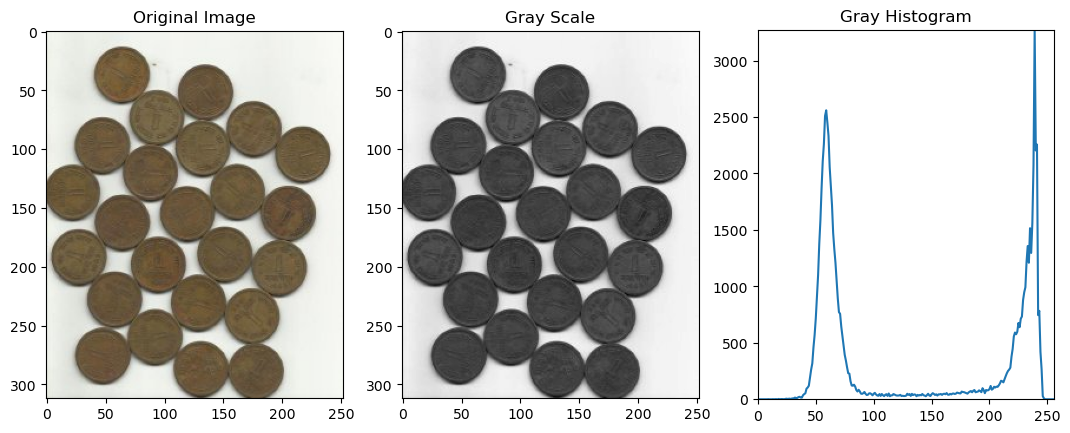

In [2]:
imgSRC = cv2.imread('water_coins.jpg')
#imgSRC = cv2.imread('Pallet.jpeg')
#imgSRC = cv2.imread('PinkAvocado.jpeg')
#imgSRC = cv2.imread('Wharehouse.jpg')

imgRGB = cv2.cvtColor(imgSRC, cv2.COLOR_BGR2RGB)
imgGray = cv2.cvtColor(imgSRC, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.subplots_adjust(right = 1.7)
plt.subplot(1, 3, 1)
plt.imshow(imgRGB)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(imgGray, cmap='gray')
plt.title('Gray Scale')

plt.subplot(1, 3, 3)
hist = cv2.calcHist([imgSRC], [0], None, [256], [0, 256])
plt.xlim([0, 256])
plt.ylim([0, hist.max()])
plt.plot(hist)
plt.title('Gray Histogram');

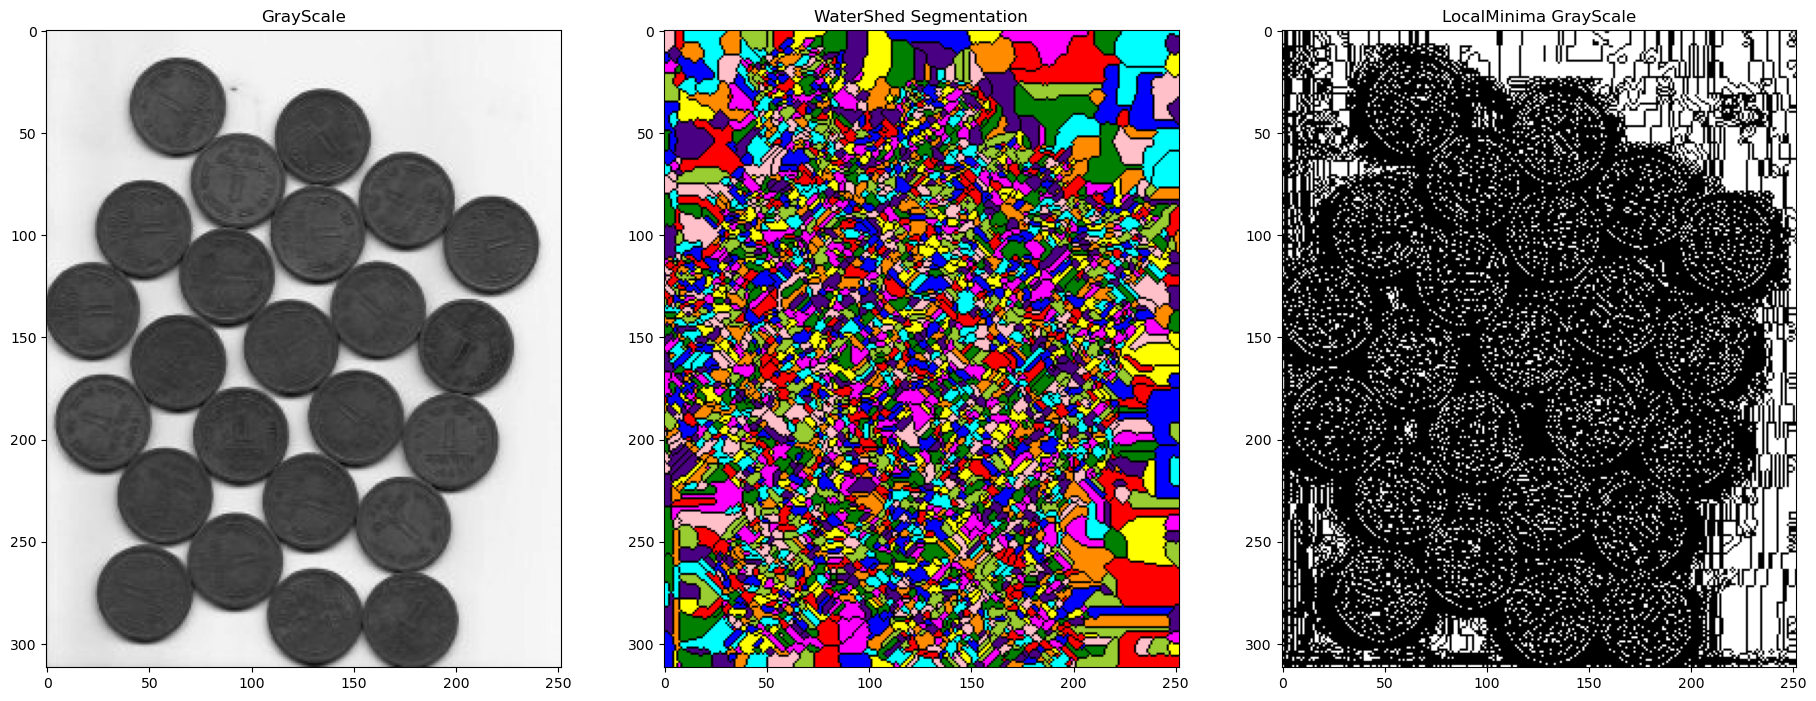

In [3]:
thWaterShed = watershed(imgGray, watershed_line=True)
wSSegmentation = label2rgb(thWaterShed)
imgLocMin = mahotas.locmin((imgGray))

plt.figure(figsize=(20,50))
pl.subplots_adjust(right=1)
plt.subplots_adjust(right=1)

plt.subplot(1, 3, 1)
plt.imshow(imgGray, cmap='gray')
plt.title('GrayScale');

plt.subplot(1, 3, 2)
plt.imshow(wSSegmentation)
plt.title('WaterShed Segmentation');

plt.subplot(1, 3, 3)
plt.imshow(imgLocMin, cmap='gray')
plt.title('LocalMinima GrayScale');

162


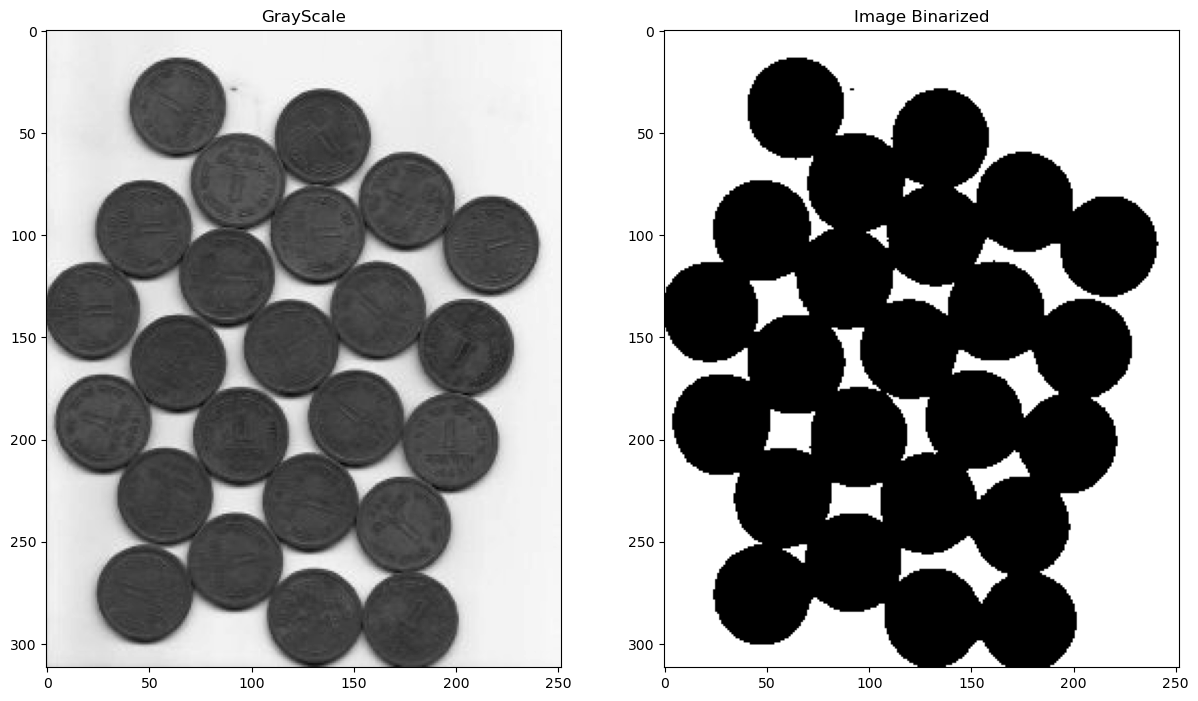

In [4]:
otsuTh = threshold_otsu(imgGray)
print(otsuTh)
binary = imgGray > otsuTh

plt.figure(figsize=(20,50))
pl.subplots_adjust(right=1)
plt.subplots_adjust(right=1)

plt.subplot(1, 3, 1)
plt.imshow(imgGray, cmap='gray')
plt.title('GrayScale');

plt.subplot(1, 3, 2)
plt.imshow(binary, cmap='gray')
plt.title('Image Binarized');

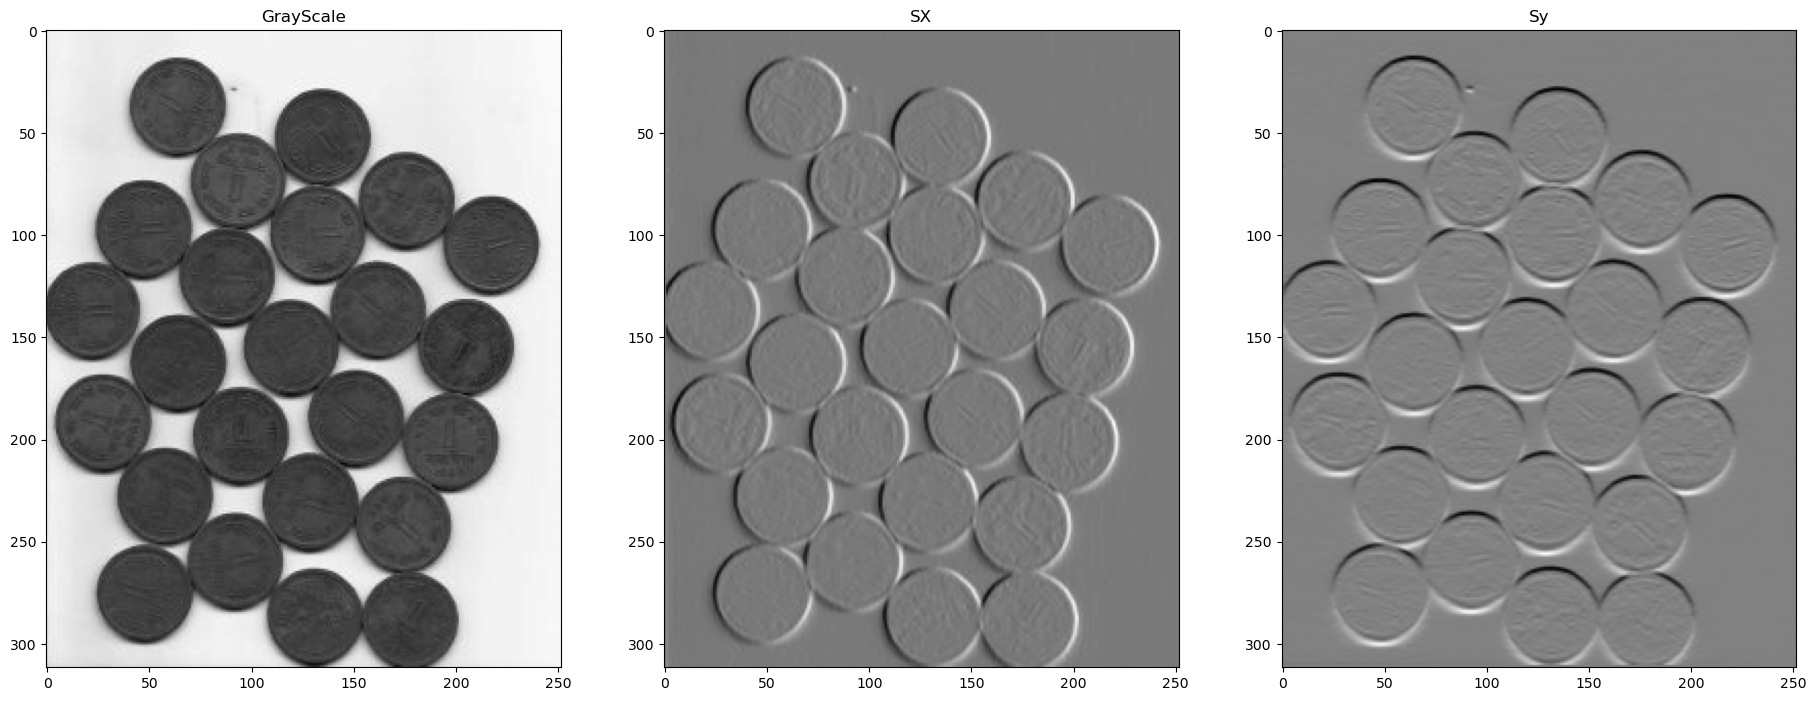

In [5]:
sobelx = cv2.Sobel(imgGray,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(imgGray,cv2.CV_64F,0,1,ksize=3)

plt.figure(figsize=(20,50))
pl.subplots_adjust(right=1)
plt.subplots_adjust(right=1)

plt.subplot(1, 3, 1)
plt.imshow(imgGray, cmap='gray')
plt.title('GrayScale');

plt.subplot(1, 3, 2)
plt.imshow(sobelx, cmap='gray')
plt.title('SX');

plt.subplot(1, 3, 3)
plt.imshow(sobely, cmap='gray')
plt.title('Sy');


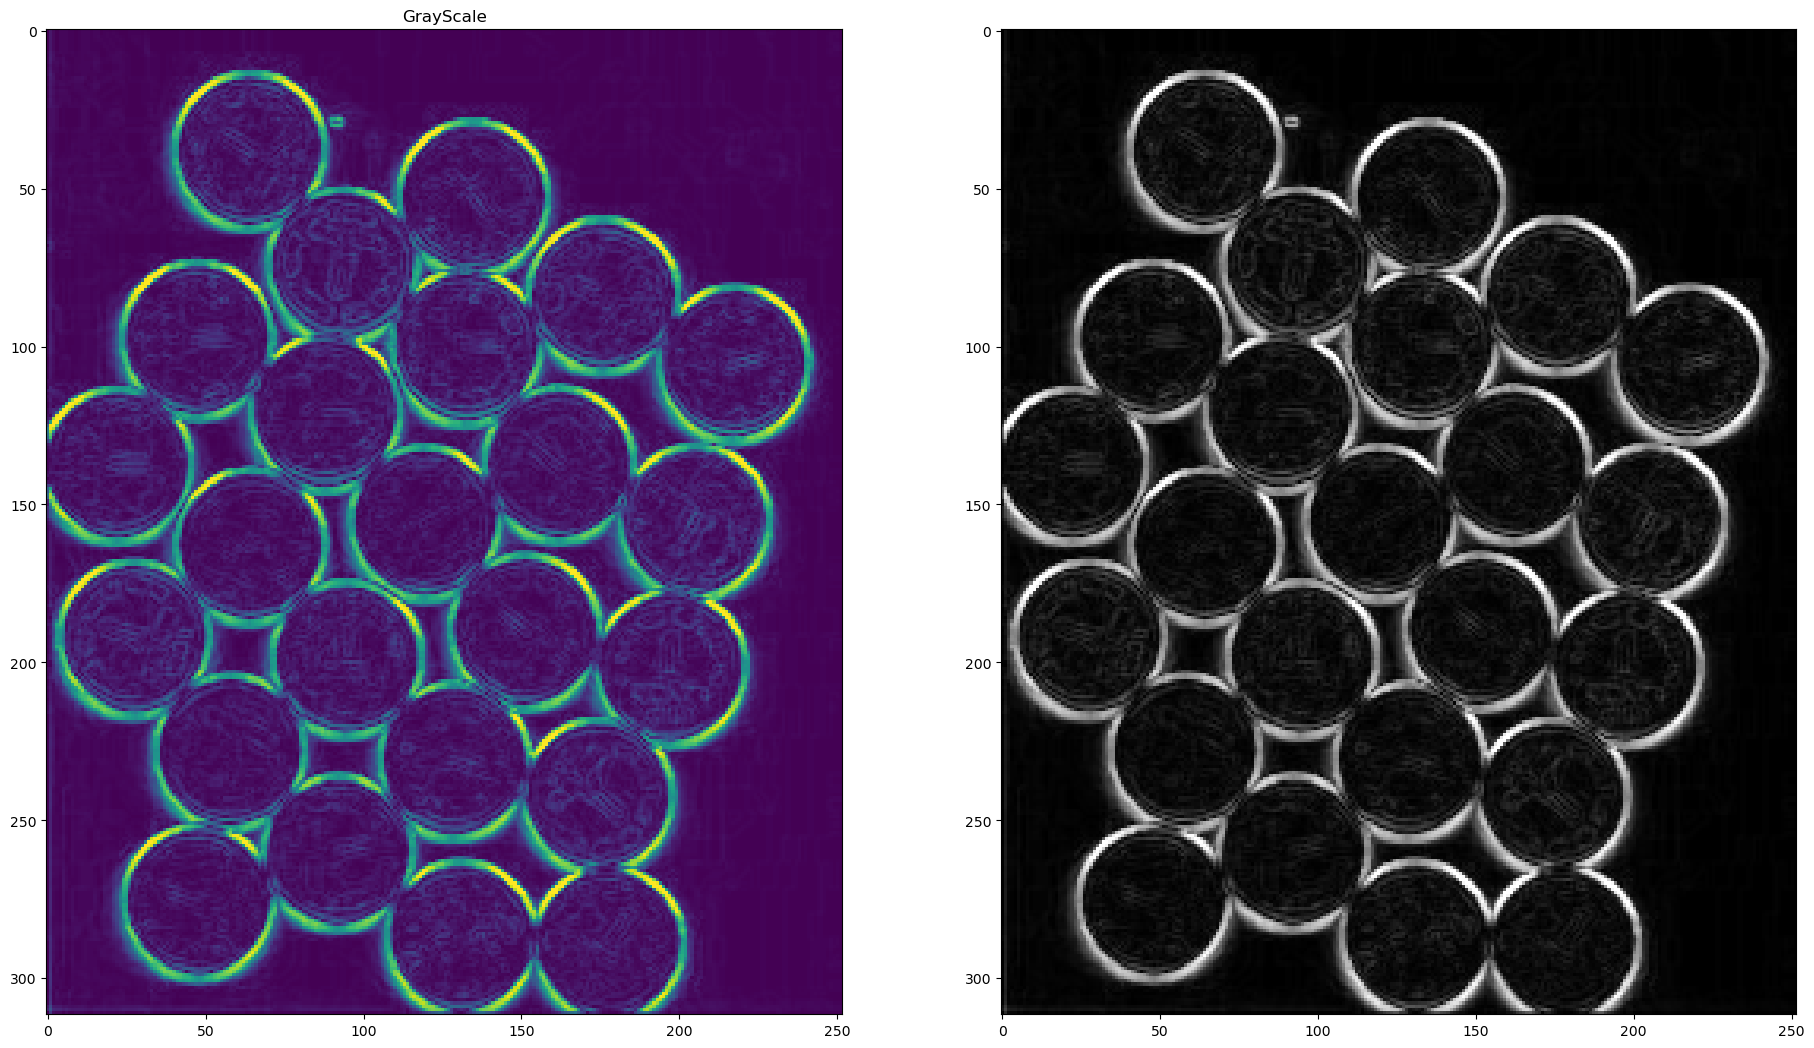

In [6]:
abs_grad_x = cv2.convertScaleAbs(sobelx)
abs_grad_y = cv2.convertScaleAbs(sobely)

grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0.0)

plt.figure(figsize = (20,50))
plt.subplots_adjust(right = 1)

plt.subplot(1, 2, 1)
plt.imshow(grad)
plt.title('GrayScale');

plt.subplot(1, 2, 2)
plt.imshow(grad, cmap='gray')

88


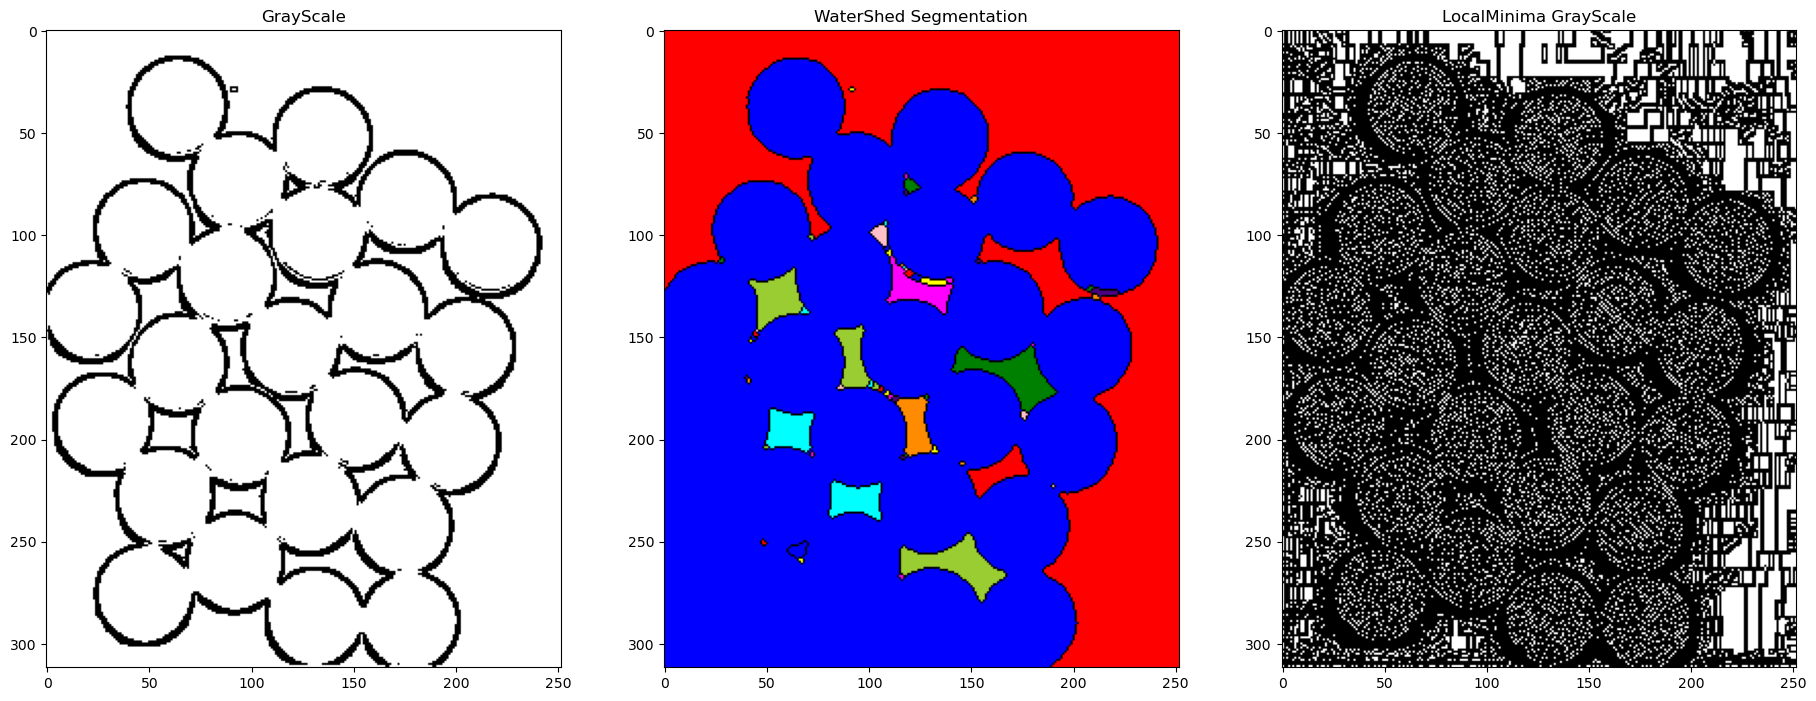

In [7]:
otsuThEdged = threshold_otsu(grad)
print(otsuTh2)
binary2 = grad > otsuTh2

ret, threshXXX = cv2.threshold(grad,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

thWaterShed2 = watershed(binary2, watershed_line=True)
wSSegmentation2 = label2rgb(thWaterShed2)
imgLocMin2 = mahotas.locmin((grad))

plt.figure(figsize=(20,50))
pl.subplots_adjust(right=1)
plt.subplots_adjust(right=1)

plt.subplot(1, 3, 1)
plt.imshow(~binary2, cmap='gray')
plt.title('GrayScale');

plt.subplot(1, 3, 2)
plt.imshow(wSSegmentation2)
plt.title('WaterShed Segmentation');

plt.subplot(1, 3, 3)
plt.imshow(imgLocMin2, cmap='gray')
plt.title('LocalMinima GrayScale');

162.0


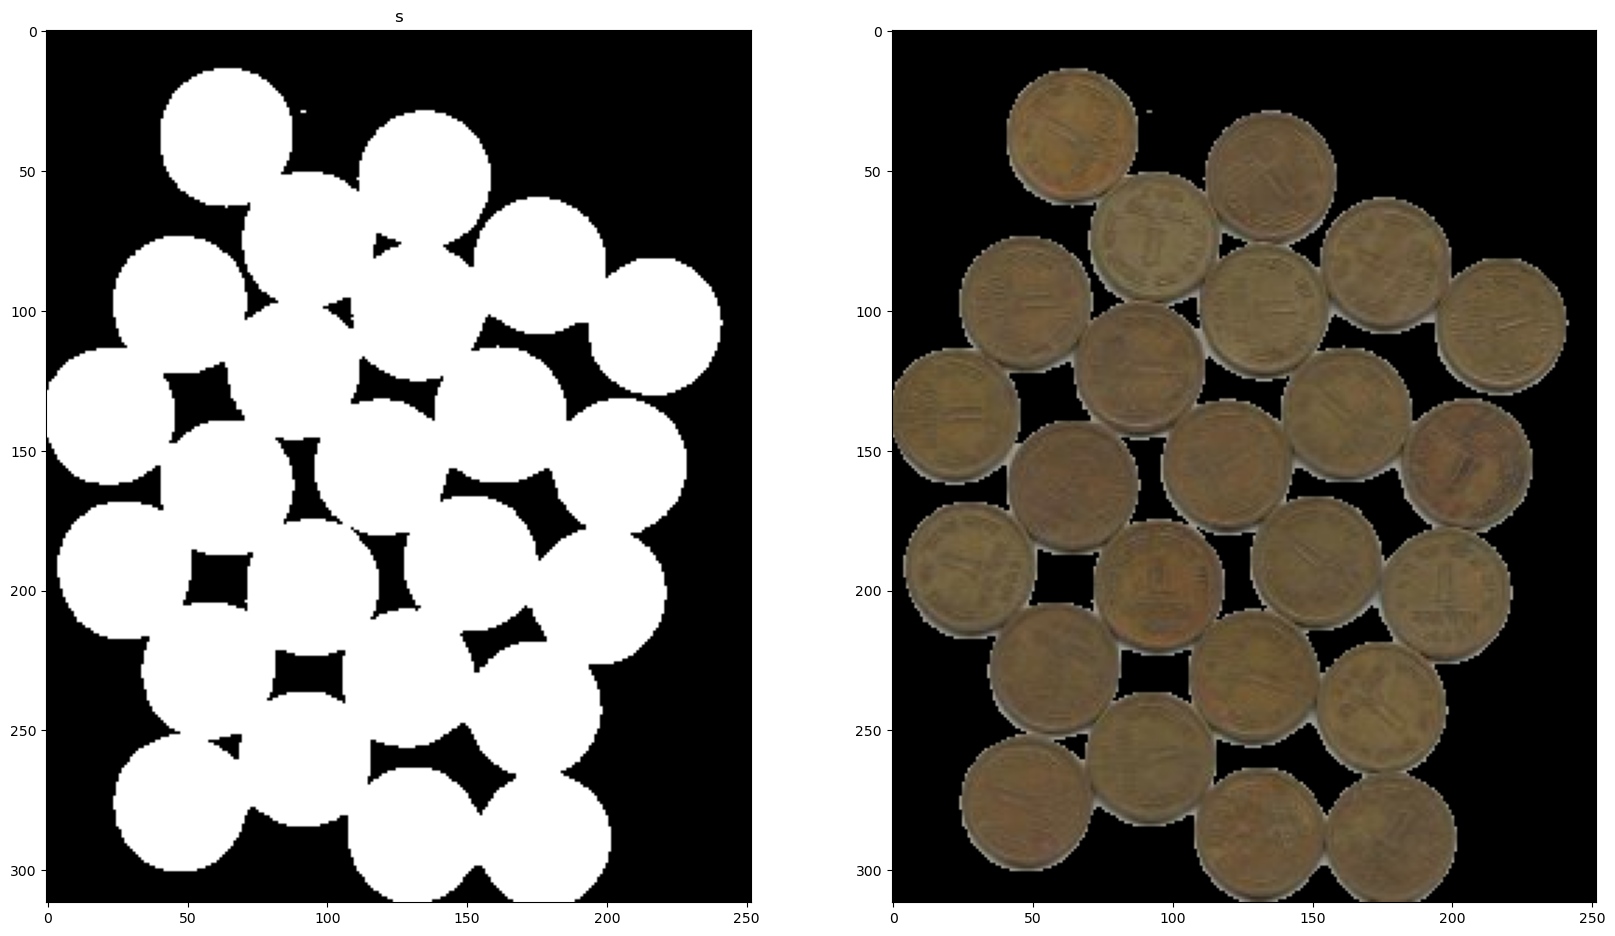

In [8]:
# apply Otsu's automatic thresholding which automatically determines
# the best threshold value
(T, threshInv) = cv2.threshold(imgGray, 0, 256, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
print(T)

plt.figure(figsize=(20, 50))
plt.subplot(1, 2, 1)
plt.imshow(threshInv, cmap='gray')
plt.title('s')

masked = cv2.bitwise_and(imgRGB, imgRGB, mask=threshInv)
plt.subplot(1, 2, 2)
plt.imshow(masked)

#cv2.imshow("Output", masked)
#cv2.waitKey(0)